<a href="https://colab.research.google.com/github/Supansapkb/bsc_dpdm22/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

In [5]:
#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/drive')
     

Mounted at /content/drive


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data_test = pd.read_csv('/content/drive/MyDrive/bsc_dpdm22/Test.csv')
print(data_test.shape) # shown nomber of (row, column)
data_test.head()

(2627, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [8]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [9]:
print(len(data_test[data_test['Graduated'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Graduated'])

24


In [10]:
print(len(data_test[data_test['Profession'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Profession'])

37


In [11]:
print(len(data_test[data_test['Ever_Married'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Ever_Married'])

47


In [12]:
print(len(data_test[data_test['Work_Experience'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Work_Experience'])

253


In [13]:
print(len(data_test[data_test['Family_Size'].isnull()])) #we used dropna()
data_test = data_test.dropna(subset=['Family_Size'])

88


In [14]:
#fill NA with Text 
data_test['Graduated'] = data_test['Graduated'].fillna('Unknown') #จบการศึกษาfillnaว่าunknown 
data_test['Profession'] = data_test['Profession'].fillna('Unknown') #อาชีพ

In [15]:
# fill NA with 0,1
data_test[['Work_Experience']]  = data_test[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_test[['Family_Size']]  = data_test[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [16]:
del data_test['Var_1']

In [17]:
data_test.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

In [18]:
data_train = pd.read_csv('/content/drive/MyDrive/bsc_dpdm22/Train.csv')
print(data_train.shape) # shown nomber of (row, column)
data_train.head(3)

(8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [19]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married        True
Age                False
Graduated           True
Profession          True
Work_Experience     True
Spending_Score     False
Family_Size         True
Var_1               True
Segmentation       False
dtype: bool

In [20]:
print(len(data_train[data_train['Ever_Married'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Ever_Married'])

140


In [21]:
print(len(data_train[data_train['Graduated'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Graduated'])

74


In [22]:
print(len(data_train[data_train['Profession'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Profession'])

113


In [23]:
print(len(data_train[data_train['Work_Experience'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Work_Experience'])

772


In [24]:
print(len(data_train[data_train['Family_Size'].isnull()])) #we used dropna()
data_train = data_train.dropna(subset=['Family_Size'])

251


In [25]:
del data_train['Var_1']

In [26]:
#fill NA with Text 
data_train['Graduated'] = data_train['Graduated'].fillna('Unknown')  #จบการศึกษาfillnaว่าunknown 
data_train['Ever_Married'] = data_train['Ever_Married'].fillna('Unknown') #สถานภาพการสมรส
data_train['Profession'] = data_train['Profession'].fillna('Unknown') #อาชีพ
# fill NA with 0,1
data_train[['Work_Experience']]  = data_train[['Work_Experience']].fillna(0) #ประสบการณ์การทำงาน
data_train[['Family_Size']]  = data_train[['Family_Size']].fillna(1) #อย่างน้อยก็ต้องอยู่คนเดียว

In [27]:
data_train.isnull().any()

ID                 False
Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Segmentation       False
dtype: bool

- Naive beys


In [45]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report


In [77]:
# Load the data
data = data_test

In [78]:
print(data.columns)

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Segmentation'],
      dtype='object')


In [79]:
X = pd.get_dummies(data.drop('Segmentation', axis=1), drop_first=True)
y = data['Segmentation']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naive Bayes model and fit it to the training set
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Evaluate the performance of the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       159
           1       0.84      0.86      0.85       225
           2       0.91      0.92      0.92       129
           3       0.79      0.82      0.81       141

    accuracy                           0.83       654
   macro avg       0.83      0.83      0.83       654
weighted avg       0.83      0.83      0.83       654



In [80]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = nb_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Accuracy:", accuracy)

Accuracy: 0.8333333333333334


- K-Mean

In [81]:
data_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,1
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,2
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,2
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,0
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,3


In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the variables to be used in the clustering algorithm
data = data_test
X = data[['Age', 'Work_Experience', 'Family_Size']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters
# You can use the elbow method or silhouette score to choose the number of clusters
k = 4

# Initialize the K-Means algorithm
kmeans = KMeans(n_clusters=k)

# Fit the K-Means algorithm to the data
kmeans.fit(X_scaled)

# Assign each data point to a cluster
labels = kmeans.labels_

# Analyze the characteristics of each cluster
# You can use the pandas library to group the data by the cluster labels
data['Segmentation'] = labels
Segmentation_data = data.groupby('Segmentation').mean()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<ipython-input-83-742566614e74>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  data.t = data_test
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

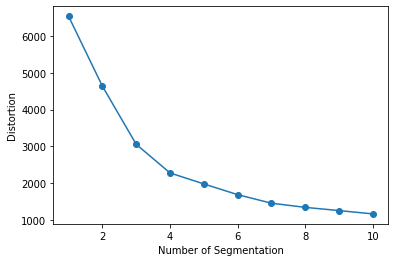

In [83]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the customer dataset into a pandas DataFrame
data.t = data_test

# Select the relevant columns
X = data.t[['Age', 'Work_Experience', 'Family_Size']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of Segmentation')
plt.ylabel('Distortion')
plt.show()


- วิธีนี้จะนำจำนวน ของ Segmentation มา Plot กับค่า SSE ซึ่งค่านี้จะมีค่าลดลงเรื่อย ๆ จากจำนวน Cluster ที่เยอะขึ้น เพราะว่าสมาชิกในแต่ละ Segmentation จะลงลดไปเรื่อย ๆ นั่นเอง ดังนั้นค่า SSE จะทำให้เกิดความโค้งที่เรียบขึ้น เเละจุดที่เหมาะสมที่สุดคือจุดโค้งหักศอก นั่นคือ ค่าที่ได้คือ K = 4 


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


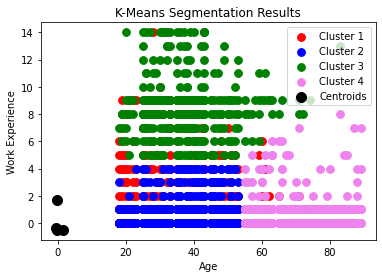

In [97]:
# Select the columns for clustering
X = data[['Age', 'Work_Experience', 'Family_Size']].values

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Visualize the resulting clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'violet', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.title('K-Means Segmentation Results')
plt.legend()
plt.show()

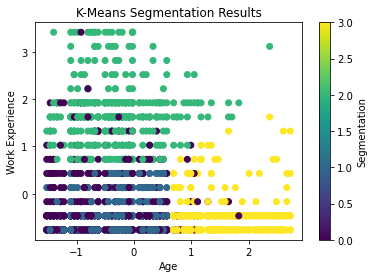

In [94]:
# Visualize the resulting clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels)
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.title('K-Means Segmentation Results')
plt.colorbar(label='Segmentation')
plt.show()  

In [67]:
# Apply the K-Means algorithm with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

data.t["Segmentation"] = labels 
data.t.head(10)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,1
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,2
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,2
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,0
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,3
7,459008,Female,Yes,47,Yes,Artist,1.0,Average,3.0,1
8,459013,Male,Yes,50,Yes,Artist,2.0,Average,4.0,0
9,459014,Male,No,19,No,Healthcare,0.0,Low,4.0,0
10,459015,Male,No,22,No,Healthcare,0.0,Low,3.0,1
11,459016,Female,No,22,No,Healthcare,0.0,Low,6.0,0


In [75]:
df= data.t[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation']]
print(df)

          ID  Age  Work_Experience  Family_Size  Segmentation
0     458989   36              0.0          1.0             1
1     458994   37              8.0          4.0             2
3     459000   59             11.0          2.0             2
5     459003   47              0.0          5.0             0
6     459005   61              5.0          3.0             3
...      ...  ...              ...          ...           ...
2621  467950   35              1.0          2.0             1
2622  467954   29              9.0          4.0             2
2623  467958   35              1.0          1.0             1
2625  467961   47              1.0          5.0             0
2626  467968   43              9.0          3.0             2

[2178 rows x 5 columns]
